<a href="https://colab.research.google.com/github/cbittel/toolbox/blob/master/BCRA_API_Estad%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Estadísticas Monetarias de la República Argentina](http://bcra.gob.ar/Imagenes/header/encabezado.jpg)

# Estadísticas Monetarias de la República Argentina
## Estadísticas BCRA - Sitio que compila los datos publicados por el BCRA.

In [0]:
import requests
import json

In [0]:
def get_estadisticas_bcra(endpoint):
    ''' 
    Funcion que toma el endpoint, y obtiene el resultado de la consulta a la 
    API Estadísticas BCRA de la web api.estadisticasbcra.com 
    Devuelve una lista con los datos JSON de respuesta convertidos en Dict.
    '''
    result_search =[]
    try:
        response = requests.get(api_url_base + '/' + endpoint, headers=headers)
        if response.status_code == 200:
            result = json.loads(response.text)
            result_search = result
    except ValueError as e:
            result_search = "Error direccion " + str(e)
    except:
            result_search = "Error OTRO " # + str(e)
            
    return result_search


In [0]:
api_token = '<Your-token-here>'
api_url_base = 'https://api.estadisticasbcra.com'

In [0]:
headers = {'Authorization':'BEARER {0}'.format(api_token)}

In [47]:
endpoint='usd_of_minorista'

dict_usd_of_minorista = get_estadisticas_bcra(endpoint)
print(dict_usd_of_minorista)

[{'d': '2010-06-01', 'v': 3.96}, {'d': '2010-06-02', 'v': 3.96}, {'d': '2010-06-03', 'v': 3.95}, {'d': '2010-06-04', 'v': 3.95}, {'d': '2010-06-07', 'v': 3.95}, {'d': '2010-06-08', 'v': 3.95}, {'d': '2010-06-09', 'v': 3.95}, {'d': '2010-06-10', 'v': 3.95}, {'d': '2010-06-11', 'v': 3.95}, {'d': '2010-06-14', 'v': 3.96}, {'d': '2010-06-15', 'v': 3.96}, {'d': '2010-06-16', 'v': 3.96}, {'d': '2010-06-17', 'v': 3.96}, {'d': '2010-06-18', 'v': 3.96}, {'d': '2010-06-22', 'v': 3.96}, {'d': '2010-06-23', 'v': 3.96}, {'d': '2010-06-24', 'v': 3.96}, {'d': '2010-06-25', 'v': 3.96}, {'d': '2010-06-28', 'v': 3.96}, {'d': '2010-06-29', 'v': 3.96}, {'d': '2010-06-30', 'v': 3.96}, {'d': '2010-07-01', 'v': 3.96}, {'d': '2010-07-02', 'v': 3.96}, {'d': '2010-07-05', 'v': 3.96}, {'d': '2010-07-06', 'v': 3.96}, {'d': '2010-07-07', 'v': 3.96}, {'d': '2010-07-08', 'v': 3.97}, {'d': '2010-07-12', 'v': 3.97}, {'d': '2010-07-13', 'v': 3.97}, {'d': '2010-07-14', 'v': 3.96}, {'d': '2010-07-15', 'v': 3.96}, {'d': '

In [48]:
endpoint='usd'

dict_usd_no_oficial = get_estadisticas_bcra(endpoint)
print(dict_usd_no_oficial)

[{'d': '2000-05-24', 'v': 1.0005}, {'d': '2000-05-25', 'v': 1.0005}, {'d': '2000-05-26', 'v': 1.0004}, {'d': '2000-05-29', 'v': 1.0007}, {'d': '2000-05-30', 'v': 1.0009}, {'d': '2000-05-31', 'v': 1.001}, {'d': '2000-06-01', 'v': 1.0007}, {'d': '2000-06-02', 'v': 1.0011}, {'d': '2000-06-05', 'v': 1.0011}, {'d': '2000-06-06', 'v': 1.001}, {'d': '2000-06-07', 'v': 1}, {'d': '2000-06-08', 'v': 0.9998}, {'d': '2000-06-12', 'v': 0.9998}, {'d': '2000-06-13', 'v': 0.9996}, {'d': '2000-06-14', 'v': 0.9999}, {'d': '2000-06-15', 'v': 0.9988}, {'d': '2000-06-16', 'v': 0.9988}, {'d': '2000-06-19', 'v': 0.9988}, {'d': '2000-06-20', 'v': 0.9994}, {'d': '2000-06-21', 'v': 0.9996}, {'d': '2000-06-22', 'v': 0.9991}, {'d': '2000-06-23', 'v': 0.9985}, {'d': '2000-06-26', 'v': 0.999}, {'d': '2000-06-27', 'v': 0.9994}, {'d': '2000-06-28', 'v': 0.999}, {'d': '2000-06-29', 'v': 0.9987}, {'d': '2000-06-30', 'v': 0.9985}, {'d': '2000-07-03', 'v': 0.9981}, {'d': '2000-07-04', 'v': 0.9981}, {'d': '2000-07-05', 'v

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
usd_of_minorista_df = pd.DataFrame(dict_usd_of_minorista,columns=['d','v'])
# convert the 'Date' column to datetime format 
usd_of_minorista_df['date']= pd.to_datetime(usd_of_minorista_df['d']) 
usd_of_minorista_df.set_index('date', inplace=True, drop=True)  

# Check the format of 'Date' column 
usd_of_minorista_df.info() 
display(usd_of_minorista_df.sample(5)) 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2378 entries, 2010-06-01 to 2020-02-28
Data columns (total 2 columns):
d    2378 non-null object
v    2378 non-null float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


,d,v
date,,
2015-11-16,2015-11-16,9.70
2019-01-11,2019-01-11,38.03
2011-08-05,2011-08-05,4.19
2015-08-20,2015-08-20,9.32
2010-10-04,2010-10-04,3.99


In [51]:
usd_noof_minorista_df = pd.DataFrame(dict_usd_no_oficial,columns=['d','v'])
# convert the 'Date' column to datetime format 
usd_noof_minorista_df['date']= pd.to_datetime(usd_noof_minorista_df['d']) 
usd_noof_minorista_df.set_index('date', inplace=True, drop=True)  

# Check the format of 'Date' column 
usd_noof_minorista_df.info()
display(usd_noof_minorista_df.sample(5)) 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4975 entries, 2000-05-24 to 2020-02-28
Data columns (total 2 columns):
d    4975 non-null object
v    4975 non-null float64
dtypes: float64(1), object(1)
memory usage: 116.6+ KB


,d,v
date,,
2002-12-03,2002-12-03,3.5800
2009-03-23,2009-03-23,3.7675
2004-10-15,2004-10-15,2.9750
2010-11-16,2010-11-16,4.0375
2016-10-05,2016-10-05,15.6000


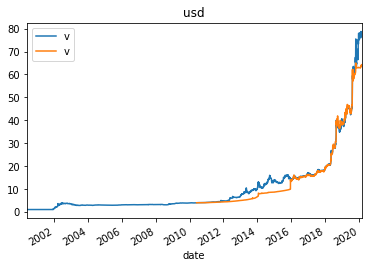

In [52]:
ax = usd_noof_minorista_df.plot(title=endpoint)
usd_of_minorista_df.plot(ax=ax)

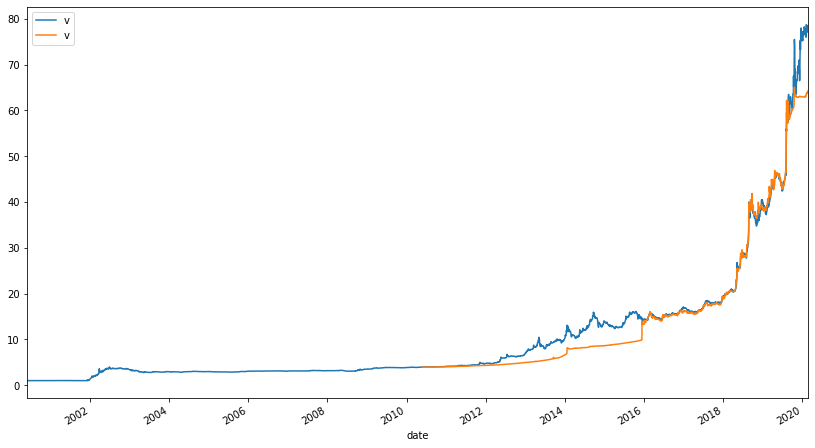

In [54]:

fig, ax = plt.subplots(figsize=(14, 8))
ax.xaxis_date()
usd_noof_minorista_df.plot(ax=ax)
usd_of_minorista_df.plot(ax=ax)
    